<h2> Problem Statements : </h2>
    <p>This is a dataset from AirBnb which is a room booking service. It has 49000 observations and 16 columns like id, name, host_id, host_name etc. From this dataset we have to extract informations as much as possible like : </p>
<ul>
    <li>data cleaning.</li>
    <li> Number of unique hosts.</li>
    <li> Number of unique neighbourhoods.</li>
    <li> What are the neighbourhood_groups?</li>
    <li> Number of unique listings?</li>
    <li> What are the types of room?</li>
    <li> Top five hosts.</li>
    <li> Distributions of price.</li>
    <li> Room type vs price graph.</li>
    <li> Neighbourhood_group price graph.</li>
    <li> visualize which types of room are high in demand.</li>
    <li> visualize which areas are highly demandable.</li>
    <li> Yearly, quarterly, monthly analysis.</li>
    <li> correlation between the data.</li>
</ul>

<h2> Business context : </h2>
<p> Since 2008, guests and hosts have used AirBnb to expand on travelling possibilities and present a more unique and personalised way of experiencing the world. Today AirBnb became one of a kind service that is used and recognised by the whole world. Data Analysis on million of listings provided through AirBnb is a curucial factor for the company. These millions of listings generates a lot of data - data that can be analysed and used for the security, business decission, understanding of customers and providers, behaviour and performance on the platform, guiding, marketing, initiatives, implementation of innovative additional services and much more. This dataset has around 49000 observations and 16 columns and it is a mix of catagorical and numerical values. Explore and Analyse the data to discover key understandings.</p>

<h2> Date Understanding : </h2>
<ul>
    <li>id - Listing ID </li>
    <li>name - Listing name </li>
    <li>host_id - Host ID </li>
    <li>host_name - Host name </li>
    <li>neighbourhood_group - Location </li>
    <li>neighbourhood - Area </li>
    <li>latitude - Latitude condinates </li>
    <li>longitude - Longitude condinates </li>
    <li>room_type - Listing space type </li>
    <li>price - Price in dollars </li>
    <li>minimum_nights - ammount of minimum nights </li>
    <li>number_of_reviews - Number of reviews </li>
    <li>last_review - Last review date </li>
    <li>reviews_per_month - Number of reviews per month </li>
    <li>calculated_host_listings_count - ammount of listing per host </li>
    <li>availability_365 - number of days when listing is available for booking </li>
</ul>

In [38]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2> Data inspection </h2>

In [39]:
# data reading and first view
# path = "E://Data Science//amlabetter//Capstone Projects//EDA//Airbnb NYC 2019.csv"
# airbnb_df = pd.read_csv(path)
# airbnb_df.head()

In [40]:
path = "/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Capstone Project/Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(path)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [41]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [42]:
# rows and columns length
airbnb_df.shape

(48895, 16)

In [43]:
# Looking for null values and data types
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [44]:
# columns in the dataframe
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [45]:
# Data summary
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<h2> EDA</h2>

#### Calculating and dropping null values.

In [46]:
# function for calculating percentage of null values in eaach columns
def null_percentage_calulator(df):
    ''' it takes DataFrame and returns percentage of null values in each columns as a dictionary'''
    null_col_dict = {col:len(airbnb_df[airbnb_df[col].isnull() == True ]) for col in airbnb_df.columns}
    return {i[0] : round((i[1]*100)/len(airbnb_df),2) for i in null_col_dict.items()}

# checking null values using above function
null_percentage_calulator(airbnb_df)

{'id': 0.0,
 'name': 0.03,
 'host_id': 0.0,
 'host_name': 0.04,
 'neighbourhood_group': 0.0,
 'neighbourhood': 0.0,
 'latitude': 0.0,
 'longitude': 0.0,
 'room_type': 0.0,
 'price': 0.0,
 'minimum_nights': 0.0,
 'number_of_reviews': 0.0,
 'last_review': 20.56,
 'reviews_per_month': 20.56,
 'calculated_host_listings_count': 0.0,
 'availability_365': 0.0}

#### what is the:<br>
    number of unique hosts.
    number of unique listings.
    unique neighbourhoods.
    unique neighbourhood_group.
    unique room types.

In [50]:
# Number of unique hosts, neighbourhood_groups and room type before dropping null columns
print("number of unique hosts :",len(airbnb_df['host_id'].unique()))
print("number of unique listings :",len(airbnb_df['name'].unique()))
print("number of unique neighbourhoods : ",len(airbnb_df['neighbourhood'].unique()))
print("number of unique neighbourhood_group :",len(airbnb_df['neighbourhood_group'].unique()),airbnb_df['neighbourhood_group'].unique())
print("number of unique room type :",len(airbnb_df['room_type'].unique()),airbnb_df['room_type'].unique())
print(f"\n Sum of listings for all neighbourhood_groups : {airbnb_df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum()}")

number of unique hosts : 37457
number of unique listings : 47906
number of unique neighbourhoods :  221
number of unique neighbourhood_group : 5 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
number of unique room type : 3 ['Private room' 'Entire home/apt' 'Shared room']

 Sum of listings for all neighbourhood_groups : neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64


<h3>There are 3% null values in "name" and 4% in "host_name" columns I think dropping 3-4% of data will not affect much.</h3>

In [51]:
# dropping null values from name and host_name columns
airbnb_df.dropna(subset = ['name','host_name'], axis = 0, inplace = True)
airbnb_df.shape

(48858, 16)

In [52]:
# Number of unique hosts, neighbourhood_groups and room type after dropping null columns
print("number of unique hosts :",len(airbnb_df['host_id'].unique()))
print("number of unique listings :",len(airbnb_df['name'].unique()))
print("number of unique neighbourhoods : ",len(airbnb_df['neighbourhood'].unique()))
print("number of unique neighbourhood_group :",len(airbnb_df['neighbourhood_group'].unique()),airbnb_df['neighbourhood_group'].unique())
print("number of unique room type :",len(airbnb_df['room_type'].unique()),airbnb_df['room_type'].unique())

# number of unique hosts  before dropping the null values : 37457

number of unique hosts : 37425
number of unique listings : 47884
number of unique neighbourhoods :  221
number of unique neighbourhood_group : 5 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
number of unique room type : 3 ['Private room' 'Entire home/apt' 'Shared room']


### Distribution plots for price column before and after log transformation

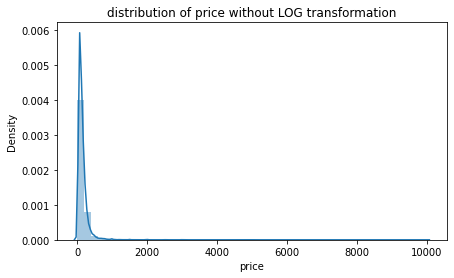

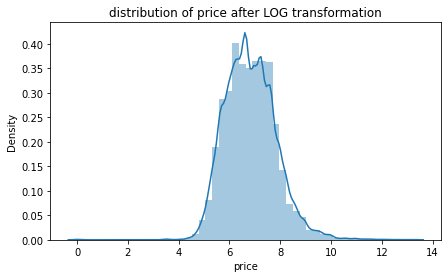

In [53]:
# distribution of price without LOG transformation
plt.rcParams['figure.figsize'] = (7,4)
sns.distplot(airbnb_df['price'])
plt.title('distribution of price without LOG transformation')
plt.show()
print('\n')
# distribution of price after LOG transformation
plt.rcParams['figure.figsize'] = (7,4)
sns.distplot(np.log2(airbnb_df['price']+1))
plt.title('distribution of price after LOG transformation')
plt.show()

<h3>
    Name and Host_ID for Top five unique hosts.
</h3>

In [54]:
# Function for extracting top five hosts
def top_5_unique(df):
    ''' Takes a dataframe and returns top five observations according to calculated_host_listings_counts columns '''
    top_5_hosts = list(airbnb_df['host_id'].value_counts(ascending=False).head())
    result_df = pd.DataFrame(columns=df.columns)
    for i in top_5_hosts:
        result_df = result_df.append(df[ df['calculated_host_listings_count'] == i].head(1))
    print(top_5_hosts)
    return result_df

print('These are top five number of unique hostings \n')
top_5_unique(airbnb_df)[['host_id','host_name']]

These are top five number of unique hostings 

[327, 232, 121, 103, 96]


,host_id,host_name
38293,219517861,Sonder (NYC)
26137,107434423,Blueground
9740,30283594,Kara
32718,137358866,Kazuya
5093,16098958,Jeremy & Laura


####  Calculation and visualizations fot Average price per neighbourhood_group and room type.

In [22]:
# average price per neighbourhood and room type
avg_neighbourhood_room_type = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().round(2)
print("Average price per neighbourhood for each type of rooms \n")
avg_neighbourhood_room_type

Average price per neighbourhood for each type of rooms 



neighbourhood_group  room_type      
Bronx                Entire home/apt    127.65
                     Private room        66.79
                     Shared room         58.61
Brooklyn             Entire home/apt    178.36
                     Private room        76.51
                     Shared room         50.53
Manhattan            Entire home/apt    249.24
                     Private room       116.81
                     Shared room         88.98
Queens               Entire home/apt    147.05
                     Private room        71.78
                     Shared room         69.02
Staten Island        Entire home/apt    173.85
                     Private room        62.29
                     Shared room         57.44
Name: price, dtype: float64

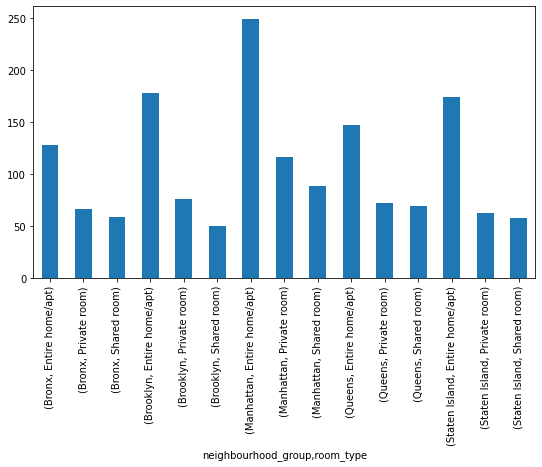

In [55]:
# Bar chart for each neighbourhood_group and average price
plt.rcParams['figure.figsize'] = (9,5)
avg_neighbourhood_room_type.plot.bar()

 Average price for each type of room in each neighbourhood_group : 
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.645503     66.788344    58.610169
Brooklyn                  178.362609     76.510619    50.527845
Manhattan                 249.238211    116.805594    88.977083
Queens                    147.050573     71.776855    69.020202
Staten Island             173.846591     62.292553    57.444444


Text(0.5, 0, 'Neighbourhood')

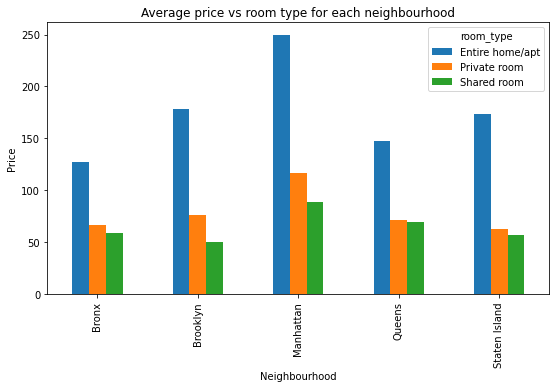

In [56]:
# Room type vs average price for each neighbourhood
print(f" Average price for each type of room in each neighbourhood_group : \n {airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()}")
airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot.bar()
plt.title('Average price vs room type for each neighbourhood')
plt.ylabel('Price')
plt.xlabel('Neighbourhood')

 Average price for each type of room in each neighbourhood_group : 
 neighbourhood_group       Bronx    Brooklyn   Manhattan      Queens  \
room_type                                                             
Entire home/apt      127.645503  178.362609  249.238211  147.050573   
Private room          66.788344   76.510619  116.805594   71.776855   
Shared room           58.610169   50.527845   88.977083   69.020202   

neighbourhood_group  Staten Island  
room_type                           
Entire home/apt         173.846591  
Private room             62.292553  
Shared room              57.444444  


Text(0.5, 0, 'Room type')

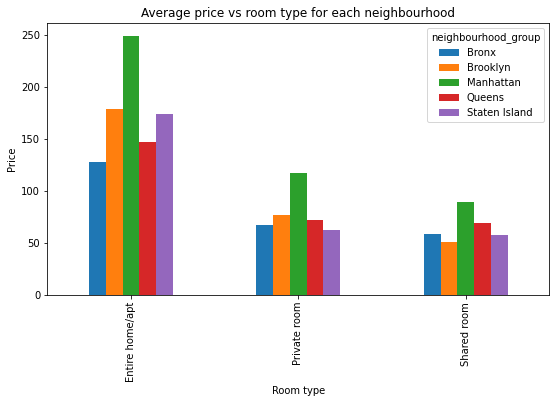

In [57]:
# Average price vs neighbourhood for each room type
print(f" Average price for each type of room in each neighbourhood_group : \n {airbnb_df.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()}")
airbnb_df.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack().plot.bar()
plt.title('Average price vs room type for each neighbourhood')
plt.ylabel('Price')
plt.xlabel('Room type')

sum of price in each neighbourhood_group : 
neighbourhood_group
Bronx              2435
Brooklyn          45908
Manhattan        277044
Queens            23003
Staten Island       865
Name: calculated_host_listings_count, dtype: int64


Text(0, 0.5, 'Sum of listings')

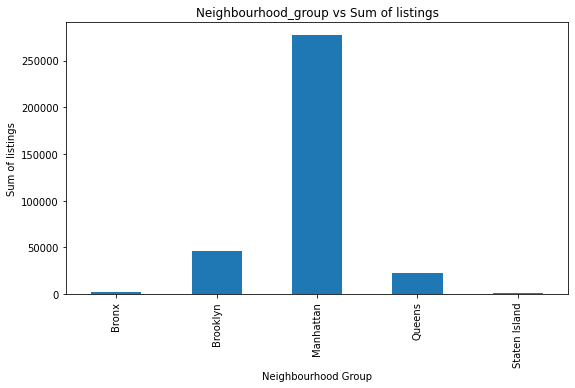

In [58]:
# neighbourhood_group vs calculated_host_listings_count
print(f"sum of price in each neighbourhood_group : \n{airbnb_df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum()}")

# visualization
airbnb_df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum().plot.bar()
plt.title('Neighbourhood_group vs Sum of listings')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Sum of listings')

Highest minimum nights spent in each type of room:  room_type
Entire home/apt    1250
Private room        999
Shared room         999
Name: minimum_nights, dtype: int64 


Highest minimum nights spent in each neighbourhood_group:  neighbourhood_group
Bronx             365
Brooklyn          999
Manhattan        1250
Queens            500
Staten Island     365
Name: minimum_nights, dtype: int64


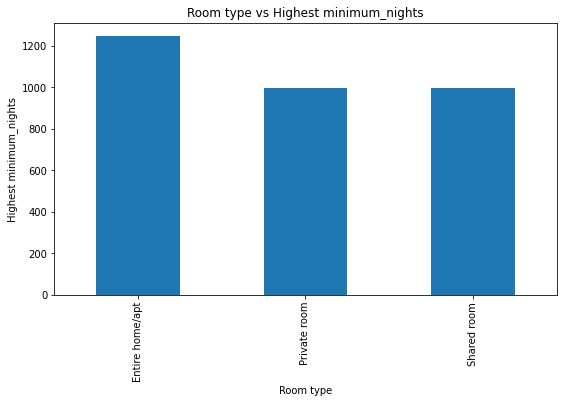

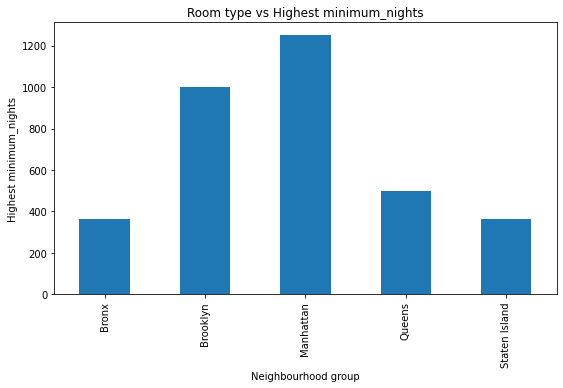

In [60]:
# Analysis of minimum_night column
print(f"Highest minimum nights spent in each type of room:  {airbnb_df.groupby(['room_type'])['minimum_nights'].max()} \n\n")
print(f"Highest minimum nights spent in each neighbourhood_group:  {airbnb_df.groupby(['neighbourhood_group'])['minimum_nights'].max()}")

# bar plot
airbnb_df.groupby(['room_type'])['minimum_nights'].max().plot.bar()
plt.title('Room type vs Highest minimum_nights')
plt.xlabel('Room type')
plt.ylabel('Highest minimum_nights')
plt.show()

#bar plot
airbnb_df.groupby(['neighbourhood_group'])['minimum_nights'].max().plot.bar()
plt.title('Room type vs Highest minimum_nights')
plt.xlabel('Neighbourhood group')
plt.ylabel('Highest minimum_nights')
plt.show()

 Average price for each type of room: 
room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
Name: price, dtype: float64


Text(0, 0.5, 'Price')

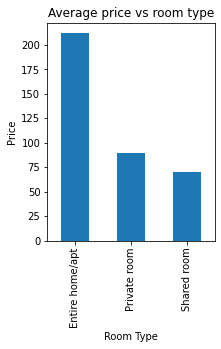

In [61]:
# Average price vs room type
print(f" Average price for each type of room: \n{airbnb_df.groupby(['room_type'])['price'].mean()}")
# Plots
plt.rcParams['figure.figsize'] = (3,4)
airbnb_df.groupby(['room_type'])['price'].mean().plot.bar()
plt.title('Average price vs room type')
plt.xlabel('Room Type')
plt.ylabel('Price')

Total number of listings for each room type : 
room_type
Entire home/apt    271812
Private room        72035
Shared room          5408
Name: calculated_host_listings_count, dtype: int64


Text(0, 0.5, 'Sum of listings')

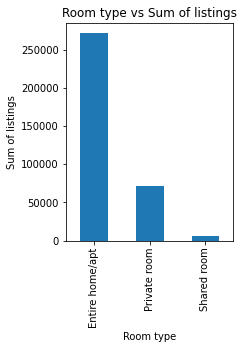

In [62]:
# Room type vs calculated_host_listings_count plot
print(f"Total number of listings for each room type : \n{airbnb_df.groupby('room_type')['calculated_host_listings_count'].sum()}")
airbnb_df.groupby('room_type')['calculated_host_listings_count'].sum().plot.bar()
plt.title('Room type vs Sum of listings')
plt.xlabel('Room type')
plt.ylabel('Sum of listings')

# Date wise Analysis

Dropping null values and performing date time operations after converting str column to datetime and doing analysis of the column.

In [63]:
# dropping null values from last_review and reviews_per_months columns
airbnb_df.dropna(subset = ['last_review','reviews_per_month'], inplace = True)
null_percentage_calulator(airbnb_df)

{'id': 0.0,
 'name': 0.0,
 'host_id': 0.0,
 'host_name': 0.0,
 'neighbourhood_group': 0.0,
 'neighbourhood': 0.0,
 'latitude': 0.0,
 'longitude': 0.0,
 'room_type': 0.0,
 'price': 0.0,
 'minimum_nights': 0.0,
 'number_of_reviews': 0.0,
 'last_review': 0.0,
 'reviews_per_month': 0.0,
 'calculated_host_listings_count': 0.0,
 'availability_365': 0.0}

In [64]:
# Converting from string to date time
from datetime import datetime
airbnb_df['last_review'] = airbnb_df['last_review'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [65]:
# Quarter calculator
def quarter_calculator(data):
    col = data.month
    if col < 4:
        return 1
    elif col >= 4 and col <= 6:
        return 2
    elif col >= 7 and col <= 9:
        return 3
    else :
        return 4 

# creating columns: YEAR, MONTH, DAY and QUARTER
airbnb_df['year'] = airbnb_df['last_review'].apply(lambda x: x.year)
airbnb_df['month'] = airbnb_df['last_review'].apply(lambda x: x.month)
airbnb_df['day'] = airbnb_df['last_review'].apply(lambda x: x.day)
airbnb_df['quarter'] = airbnb_df['last_review'].apply(quarter_calculator)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,quarter
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19,4
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,5,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19,4
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,6,22,2


 Average yearly price : 
year
2011    169.000000
2012    158.120000
2013    256.208333
2014    160.326633
2015    157.277378
2016    151.823899
2017    135.453949
2018    138.976021
2019    141.788977
Name: price, dtype: float64


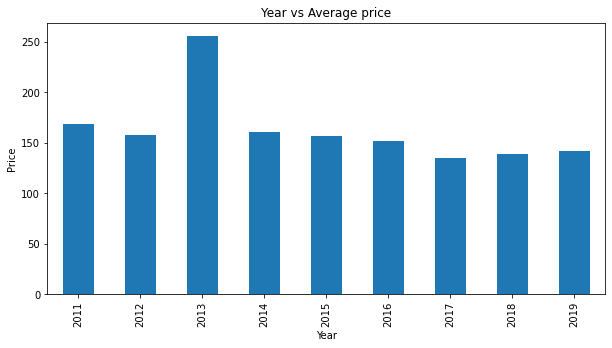

 Average quarterly price : 
quarter
1    147.680556
2    139.984163
3    141.694119
4    148.578394
Name: price, dtype: float64


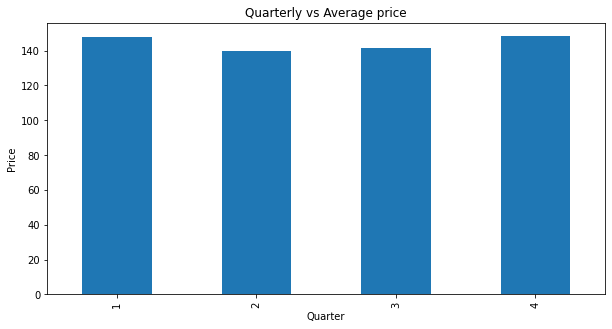

 Average monthly price : 
month
1     150.492769
2     155.716883
3     136.836957
4     139.504979
5     137.920638
6     140.772413
7     142.321928
8     132.254360
9     149.494463
10    142.031068
11    138.605013
12    160.819672
Name: price, dtype: float64


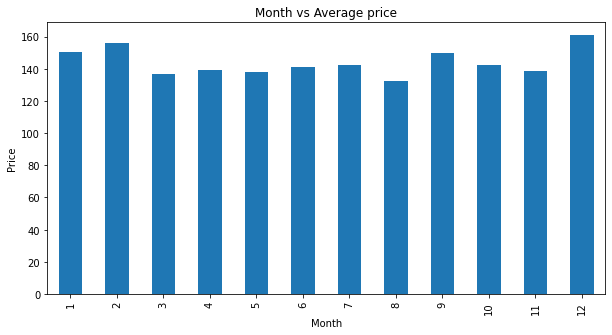

In [67]:
# year vs average price, quarter vs average price, month vs average price plots
print(f" Average yearly price : \n{airbnb_df.groupby(['year'])['price'].mean()}")
plt.rcParams['figure.figsize'] = (10,5)
airbnb_df.groupby(['year'])['price'].mean().plot.bar()
plt.title('Year vs Average price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

print(f" Average quarterly price : \n{airbnb_df.groupby(['quarter'])['price'].mean()}")
airbnb_df.groupby(['quarter'])['price'].mean().plot.bar()
plt.title('Quarterly vs Average price')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.show()

print(f" Average monthly price : \n{airbnb_df.groupby(['month'])['price'].mean()}")
airbnb_df.groupby(['month'])['price'].mean().plot.bar()
plt.title('Month vs Average price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

# airbnb_df.groupby(['day'])['price'].mean().plot.bar()
# plt.title('Day vs Average price')
# plt.xlabel('Day')
# plt.ylabel('Price')
# plt.show()

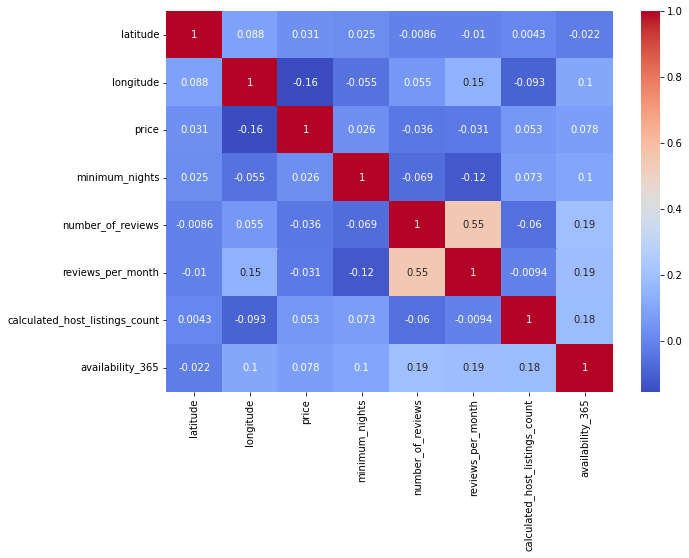

In [68]:
# Correlation analysis
plt.rcParams['figure.figsize'] = (10,7)
corr = airbnb_df.drop(columns=['year', 'month', 'day', 'quarter','id','host_id'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

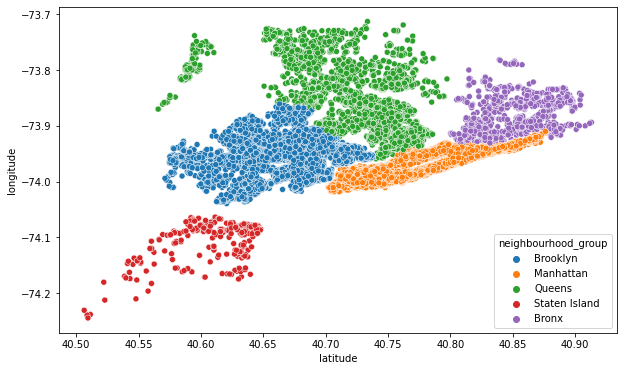

In [69]:
# Map of Neighbourhood_group
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(airbnb_df['latitude'],airbnb_df['longitude'],hue=airbnb_df['neighbourhood_group'])

# Conclusions:
### There are 3% null values in name, 4% in host_name, 20.56% in last_reviews and 20.56% in reviews_per_month columns in the dataset.
<ol>
    <li>price column was possitively skewed but after Log transformation it became almost normally distrubuted</li>
    <li>number of unique hosts : 37457</li>
    <li>number of unique listings : 47906</li>
    <li>number of unique neighbourhoods :  221</li>
    <li>number of unique neighbourhood_group : 5 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']</li>
    <li>number of unique room type : 3 ['Private room' 'Entire home/apt' 'Shared room']</li>
    <li>
Neighbourhood groups with maximum number of listings : Manhattan (277073)</li>
    <li>Top five unique hosts are : Sonder (NYC) with 327 hostings, Blueground with 232 hostings, Kara with 121 hostings, Kazuya with 103 hostings, Jeremy & Laura with 96 hostings.</li>
    <li>
Highest average price for Entire home/apt in Manhattan is 249.24</li>
    <li>Highest average price for Private Room in Manhattan is 116.81</li>
    <li>Highest average price for Shared Room in Manhattan is 88.98</li>
    <li>Highest minimum nights spent for Entire Home/apt in Manhatten is 1250</li>
    <li>Highest average price for year 2013 is 256.20</li>
</ol>